# Scikit-Learn: 
package providing extensive common machine learning algorithms

## Data Representation: numpy array or pandas.series

In [9]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [195]:
from sklearn.datasets import load_iris

iris = load_iris().data   # numpy
y = load_iris().target

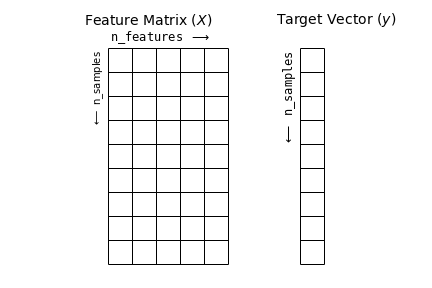

In [33]:
from IPython.display import Image
Image(filename="c:/python/images/feature_target_fig.png")

In [197]:
import seaborn as sns
iris = sns.load_dataset('iris')   # pandas dataframe
iris.head()     

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Sklearn's API (application programming interface) steps
-  Look into dataset and decide to supervised or unsupervise learning
-  Choose appropriate estimator class from sklearn
-  Set the model's hyperparameters (intercept in linear regression, number of clusters)
-  Fit data into the model using ```fit()```
-  Create new data and with them fit the model
        -supervised: predict()
        -unsupervised: predict()  or transform()

###  Data Generation

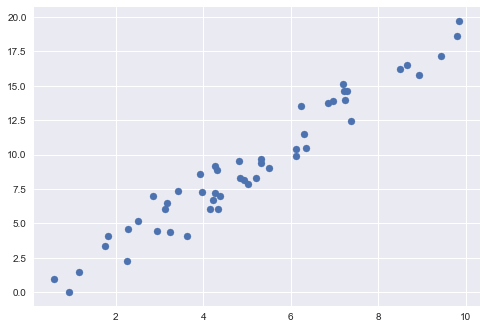

In [207]:
# create data: X = random(50), y= -1 + 2 * x + randn(50)

rng = np.random.RandomState(123)
x = 10 * rng.rand(50)
y = -1 + 2 * X + rng.randn(50)

plt.style.use('seaborn')
plt.scatter(x, y)

### Choose model: Linear Regression


In [65]:
from sklearn.linear_model import LinearRegression

### Set model's hyperparameter

In [203]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Fit the model

In [208]:
# check the data as matrix form (array or pd.series)

X = x[:, np.newaxis]
#X = x[:, None]
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [209]:
model.coef_

array([1.96684644])

In [211]:
model.intercept_

-0.7283364230020553

### predict with new data

In [212]:
xfit = np.linspace(-1, 11)

In [217]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

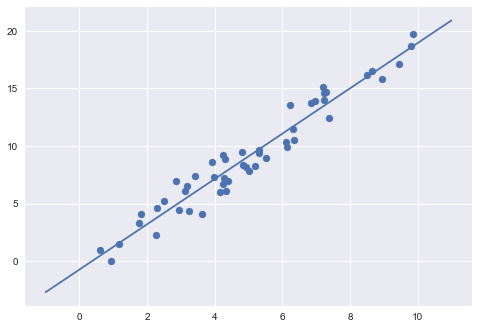

In [218]:
plt.scatter(x,y)
plt.plot(Xfit, yfit)

## Supervised learning

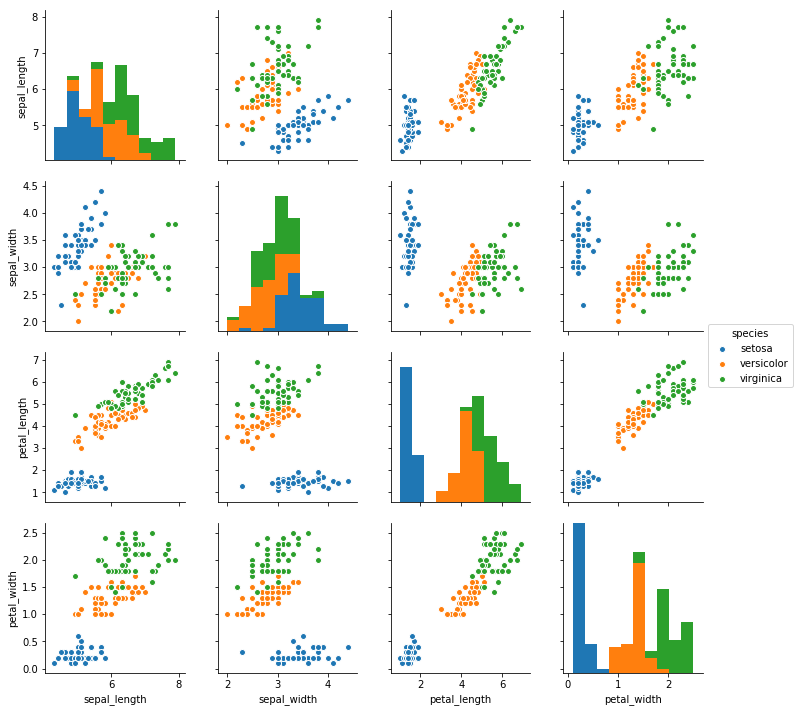

In [3]:
import seaborn as sns

%matplotlib inline
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species')

In [2]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

In [5]:
## splitting data as train and test

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)#25%

In [236]:
## Model setup

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_hat = model.predict(Xtest)

In [237]:
## Metric setup

from sklearn.metrics import accuracy_score
accuracy_score(y_hat, ytest)

0.9736842105263158

accuracy_score = $\frac{1}{n_{sample}} \sum_{i=0}^{n_{sample}} 1(y_i = \hat{y}) $ 

## Unsupervised learning with Irish data

### PCA(Principal Component Analysis)

In [6]:
from sklearn.decomposition import PCA 

model = PCA()
model.fit(X_iris)
X_2D = model.transform(X_iris)

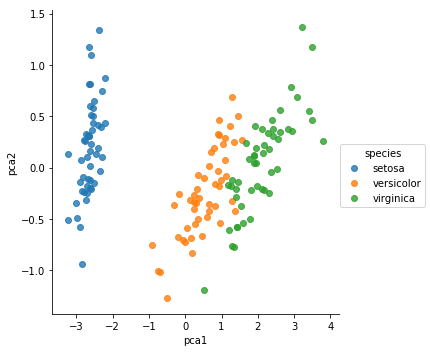

In [7]:
iris['pca1'] = X_2D[:, 0]
iris['pca2'] = X_2D[:, 1]

sns.lmplot('pca1', 'pca2', data=iris, hue='species', fit_reg=False)
## see https://seaborn.pydata.org/generated/seaborn.lmplot.html

### Clustering Analysis

In [251]:
from sklearn.mixture import GMM   # Gaussian mixture model

model = GMM(n_components=3, covariance_type='full')
model.fit(X_iris)
y_GMM = model.predict(X_iris)

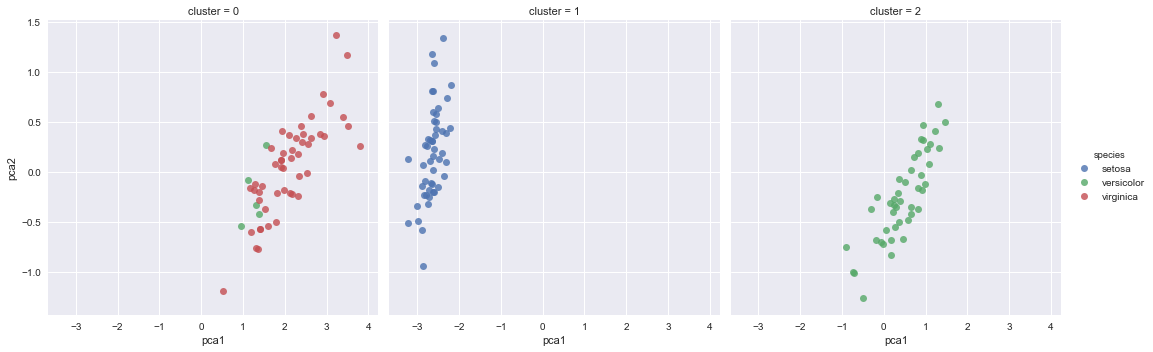

In [254]:
iris['cluster'] = y_GMM
sns.lmplot("pca1", "pca2", data=iris, hue='species',
           col='cluster', fit_reg=False);